# Introduction to Wavelet Transform using Python

El mundo del procesamiento de señales es una mezcla fascinante de matemáticas, ingeniería y ciencias de la computación. Desde el audio hasta las imágenes, e incluso conceptos más abstractos como las series temporales financieras, la capacidad de manipular y analizar señales es crucial. Entre las muchas herramientas disponibles para el ingeniero de procesamiento de señales, la Transformada Wavelet destaca por su flexibilidad y adaptabilidad. En este artículo, profundizaremos en la intuición detrás de las wavelets, mostraremos ejemplos prácticos y proporcionaremos visualizaciones útiles usando Python.

### What is a Wavelet?
A nivel fundamental, una wavelet es una pequeña onda. El término "pequeña" se utiliza para indicar que tiene una duración limitada. A diferencia de los senoidales, que se extienden desde 
−
∞
−∞ hasta 
+
∞
+∞, las wavelets están localizadas en el tiempo, lo que les otorga propiedades únicas ideales para ciertas aplicaciones.

Matemáticamente, una wavelet debe satisfacer la siguiente condición:

$$\int_{-\infty}^{\infty} \psi(t) \, dt = 0$$

Esto significa que la wavelet tiene áreas positivas y negativas iguales, lo que resulta en una media cero.

Imagina que estás tratando de entender una pieza musical compleja. Si descompones la pieza por instrumentos individuales, obtienes una comprensión más clara de la composición. La Transformada Wavelet hace algo similar con las señales.

La Transformada de Fourier, otra herramienta poderosa, descompone una señal en sus componentes senoidales. Sin embargo, carece de localización en el tiempo. Esto significa que, si ocurre un evento breve pero significativo en una señal, la Transformada de Fourier podría no capturarlo de manera efectiva.

Ahí es donde entran las wavelets. Gracias a su naturaleza localizada, las wavelets pueden capturar información tanto de frecuencia como de tiempo. Esta doble característica las hace especialmente adecuadas para señales no estacionarias, donde las propiedades de la señal cambian con el tiempo.

### Transformada Wavelet Continua (CWT)
La Transformada Wavelet Continua (CWT, por sus siglas en inglés) nos permite examinar una señal en diferentes escalas y posiciones. Matemáticamente, se representa como:

$$CWT_x(a, b) = \int_{-\infty}^{\infty} x(t) \cdot \frac{1}{\sqrt{|a|}} \, \psi\left(\frac{t-b}{a}\right) \, dt$$

donde:

- \( x(t) \) es la señal de entrada.
- \( \psi \) es la función wavelet.
- \( a \) es el factor de escala, proporcionando información sobre los componentes de frecuencia.
- \( b \) es el factor de traslación, proporcionando localización en el tiempo.

Piensa en la Transformada Wavelet Continua (CWT) como una lupa. Al ajustar la magnificación (escala \( a \)), puedes hacer zoom en partes específicas de la señal, y al mover la lupa (traslación \( b \)), puedes examinar diferentes instantes de tiempo.

## Transformada Wavelet Discreta (DWT)

Mientras que la Transformada Wavelet Continua (CWT) es continua por naturaleza, en el ámbito digital a menudo trabajamos con señales discretas. La DWT proporciona un método computacionalmente eficiente para analizar señales a varias resoluciones.

La DWT descompone una señal en dos conjuntos de coeficientes: **coeficientes de aproximación** (\( c_A \)) y **coeficientes de detalle** (\( c_D \)). Esta descomposición se realiza utilizando dos conjuntos de funciones: las funciones de escalamiento (\( \phi(t) \)) y las funciones wavelet (\( \psi(t) \)).

Dada una señal discreta \( x[n] \), los coeficientes de la DWT en la escala \( s \) y posición \( l \) se definen como:

- **Coeficientes de Aproximación**:

  $$
  c_A[s, l] = \sum_n x[n] \, \phi \left(\frac{n - 2^s l}{2^s}\right)
  $$

- **Coeficientes de Detalle**:

  $$
  c_D[s, l] = \sum_n x[n] \, \psi \left(\frac{n - 2^s l}{2^s}\right)
  $$


donde:

- \( s \) es el factor de escala. Aumentar \( s \) proporciona una vista más amplia y general de la señal (componentes de baja frecuencia).
- \( l \) es el factor de traslación, que indica la ubicación en la señal que se está analizando.
- Las funciones $\phi(t)$ y $\psi(t)$ se derivan de una wavelet seleccionada (por ejemplo, Daubechies, Haar).


El proceso de la DWT puede aplicarse iterativamente a los coeficientes de aproximación para lograr una descomposición multinivel. En cada nivel, los coeficientes de aproximación se descomponen aún más en un conjunto más detallado de coeficientes de aproximación y detalle. Esta descomposición jerárquica permite un análisis multirresolución de la señal.


El proceso de la DWT puede aplicarse de manera iterativa a los coeficientes de aproximación para lograr una descomposición multinivel. En cada nivel, los coeficientes de aproximación se descomponen aún más en un conjunto más fino de coeficientes de aproximación y de detalle. Esta descomposición jerárquica permite un análisis multirresolución de la señal.

### Analogía:

Imagina que estás observando un paisaje con binoculares. Al ajustar el zoom (similar a cambiar la escala \( s \)), puedes enfocar terrenos amplios o hacer zoom en detalles específicos. Los coeficientes de aproximación capturan la vista amplia, mientras que los coeficientes de detalle capturan las intricacias específicas. Al ajustar la posición \( l \), puedes explorar diferentes partes del paisaje. La DWT, a través de sus escalas y traslaciones, te permite explorar el "paisaje" de una señal de manera similar.

La Transformada Wavelet Discreta proporciona un marco flexible para analizar señales a diversas resoluciones. Al capturar tanto las tendencias generales (aproximación) como los detalles minuciosos (detalle), ofrece una visión completa de las características subyacentes de una señal.


### Transformada Wavelet en Python: Ejemplos Prácticos
Vamos a sumergirnos en el código. Utilizaremos la biblioteca PyWavelets (pywt) en Python para demostrar la Transformada Wavelet.

#### Configuración del Entorno
Primero, importemos las bibliotecas necesarias:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

#### 1. Análisis de Señal Simple usando la DWT
Consideremos una señal simple compuesta por dos senoidales de diferentes frecuencias. Usaremos la Transformada Wavelet Discreta (DWT) para analizar esta señal.

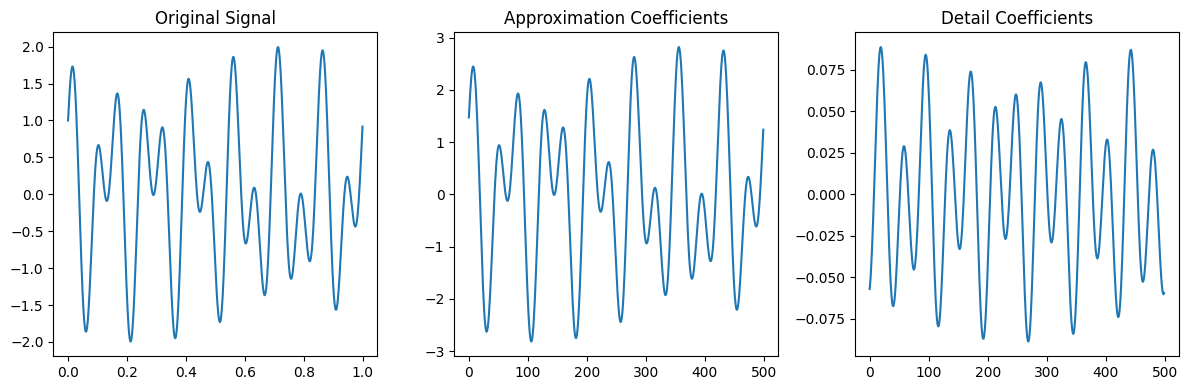

In [3]:
# Generate the signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(signal, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.tight_layout()
plt.show()

### Explicación de los Coeficientes de Aproximación y Detalle

- Los **coeficientes de aproximación** capturan la tendencia general de la señal, enfocándose en los componentes de baja frecuencia.
- Los **coeficientes de detalle** proporcionan información sobre los componentes de alta frecuencia de la señal, revelando sus variaciones y detalles finos.

- La gráfica de **"Señal Original"** muestra una señal compuesta por dos sinusoides de diferentes frecuencias.
- Los **"Coeficientes de Aproximación"** ofrecen una vista general de la señal, destacando sus componentes de baja frecuencia.
- Los **"Coeficientes de Detalle"** capturan los componentes de alta frecuencia, lo que nos permite observar las variaciones y complejidades de la señal.

#### 2. Visualización de la Transformada Wavelet de una Señal No Estacionaria

Ahora, consideremos una señal cuya frecuencia cambia con el tiempo. Utilizaremos la Transformada Wavelet Continua (CWT) para obtener una representación más rica y detallada.

C:\Users\iemma\anaconda3\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


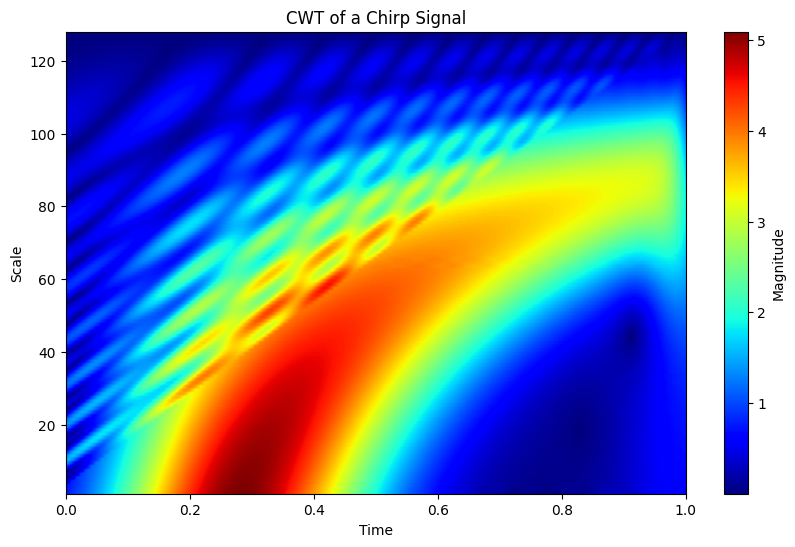

In [4]:
# Generate a chirp signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2.0 * np.pi * 7 * t * t)

# Apply CWT
coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor')

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of a Chirp Signal")
plt.show()

La gráfica de calor de la **"CWT de una Señal Chirp"** muestra una señal chirp, la cual tiene una frecuencia que cambia a lo largo del tiempo. La intensidad del color representa la magnitud de los coeficientes en diferentes escalas (eje y) y puntos de tiempo (eje x). 

- Las zonas con tonos más oscuros (azul) indican regiones con menor energía.
- Las zonas con tonos más brillantes (amarillo) indican regiones con mayor energía.

Como se puede observar, la frecuencia de la señal aumenta a medida que avanza el tiempo.

### ¡Vamos a explorar ejemplos más prácticos utilizando la Transformada Wavelet!


#### 3. Eliminación de Ruido en una Señal

Una de las aplicaciones principales de la Transformada Wavelet es la eliminación de ruido en señales. Vamos a tomar una señal sinusoidal simple, agregarle ruido, y luego utilizar la Transformada Wavelet para eliminar el ruido.

#### Generar una Señal con Ruido

Comenzaremos generando una señal sinusoidal simple y le añadiremos ruido aleatorio.


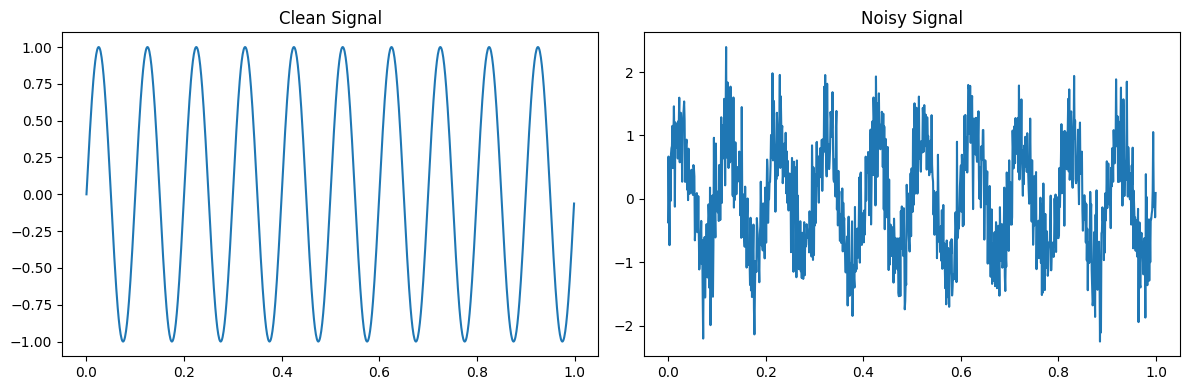

In [5]:
# Generate a simple sinusoidal signal
t = np.linspace(0, 1, 1000, endpoint=False)
clean_signal = np.sin(2.0 * np.pi * 10 * t)

# Add random noise
noise = np.random.normal(0, 0.5, clean_signal.shape)
noisy_signal = clean_signal + noise

# Plotting the clean and noisy signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, clean_signal)
plt.title("Clean Signal")
plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.tight_layout()
plt.show()

Como se observa en las gráficas:

- La **"Señal Limpia"** es una onda sinusoidal simple.
- La **"Señal con Ruido"** tiene ruido aleatorio añadido, lo que oscurece la forma de onda original.

### Eliminación de Ruido Usando la Transformada Wavelet

Para eliminar el ruido de la señal, seguiremos estos pasos:

1. Descompondremos la señal con ruido utilizando la Transformada Wavelet Discreta (DWT).
2. Aplicaremos un umbral a los coeficientes de detalle para eliminar el ruido.
3. Reconstruiremos la señal denoised utilizando la Transformada Wavelet Discreta Inversa (IDWT).


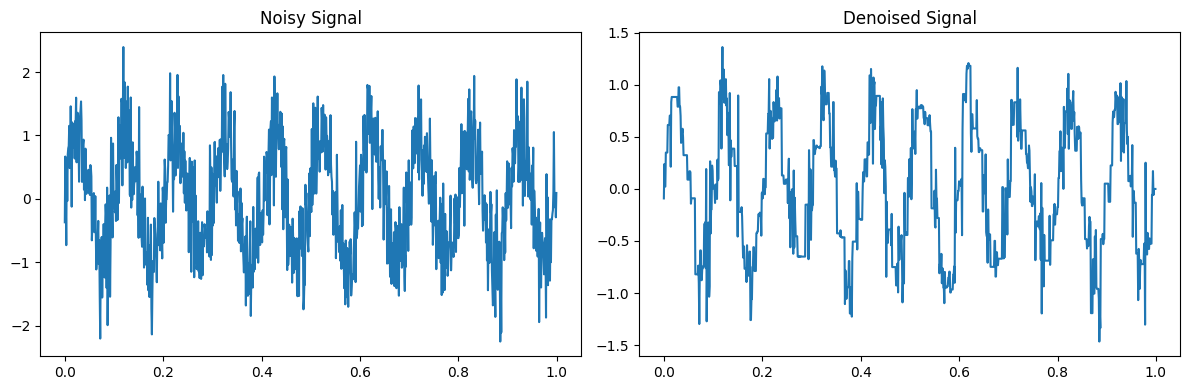

In [6]:
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, 'db1', level=4)

# Set a threshold to nullify smaller coefficients (assumed to be noise)
threshold = 0.5
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs_thresholded, 'db1')

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.tight_layout()
plt.show()

### Resultados

Los resultados demuestran claramente la eficacia de la eliminación de ruido basada en Wavelets:

- La gráfica de la **"Señal con Ruido"** muestra la señal con el ruido aleatorio añadido.
- La gráfica de la **"Señal Denoised"** presenta el resultado después de aplicar la eliminación de ruido basada en Wavelets. La forma de onda se parece mucho a la señal limpia original, con la mayor parte del ruido eliminado.
